# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Muhammad Yogie Hidayatullah
- **Email:** a545ybf356@devacademy.id
- **ID Dicoding:** A545YBF356

## Menentukan Pertanyaan Bisnis

- Polutan apa yang sering muncul dalam jumlah tinggi di aotizhongxin dan Changping?
- Bagaimana perubahan rata - rata PM 2.5 tiap tahun di aotizhongxin dan Changping?

## Import Semua Packages/Library yang Digunakan

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [19]:
Aotizhongxin_df = pd.read_csv('/content/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
Changping_df = pd.read_csv('/content/PRSA_Data_Changping_20130301-20170228.csv')

df_list = [Aotizhongxin_df, Changping_df]
df = pd.concat(df_list)
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,28.0,47.0,4.0,14.0,300.0,NaN,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping
35060,35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping
35061,35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping
35062,35063,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping


**Insight:**
- Menggabungkan 2 data menjadi 1

### Assessing Data

In [20]:
missing_values = df.isnull().sum()
print(missing_values)

No            0
year          0
month         0
day           0
hour          0
PM2.5      1699
PM10       1300
SO2        1563
NO2        1690
CO         3297
O3         2323
TEMP         73
PRES         70
DEWP         73
RAIN         71
wd          221
WSPM         57
station       0
dtype: int64


**Insight:**
- terdapat banyak missing value pada PM2.5, PM10, SO2, NO2, CO, dan O3

### Cleaning Data

In [21]:
df_numeric = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]
df[df_numeric] = df[df_numeric].fillna(df[df_numeric].median())
df["wd"] = df["wd"].fillna(df["wd"].mode()[0])
df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


**Insight:**
- Missing Value sudah dibersihkan dengan menambahkan median karena lebih realistis dan tidak bias.
- Pembersihan dipisah menjadi dua karena ada data numerik dan kategorikal

## Exploratory Data Analysis (EDA)

### Explore

In [22]:
df_pollutan= df.groupby("station")[["PM2.5","PM10", "SO2", "NO2", "CO", "O3"]].mean()
df_pollutan

,PM2.5,PM10,SO2,NO2,CO,O3
station,,,,,,
Aotizhongxin,81.961793,109.424373,17.125888,58.859282,1239.496863,55.796764
Changping,70.678137,94.397978,14.834271,44.178622,1137.019279,57.717103


In [23]:
df_pm25 = df.groupby(["year", "station"])["PM2.5"].mean().unstack()
df_pm25

station,Aotizhongxin,Changping
year,,
2013,82.346950,72.551743
2014,88.559532,78.531541
2015,81.375776,68.948276
2016,73.658925,61.530624
2017,94.278955,79.823446


**Insight:**
- Rata - rata pollutan tertinggi adalah PM10
- Max Pollutan PM10
- (CO) mungkin adalah outlier

## Visualization & Explanatory Analysis

### Pertanyaan 1: Polutan apa yang sering muncul dalam jumlah tinggi di Aotizhongxin dan Changping?

<Figure size 800x500 with 0 Axes>

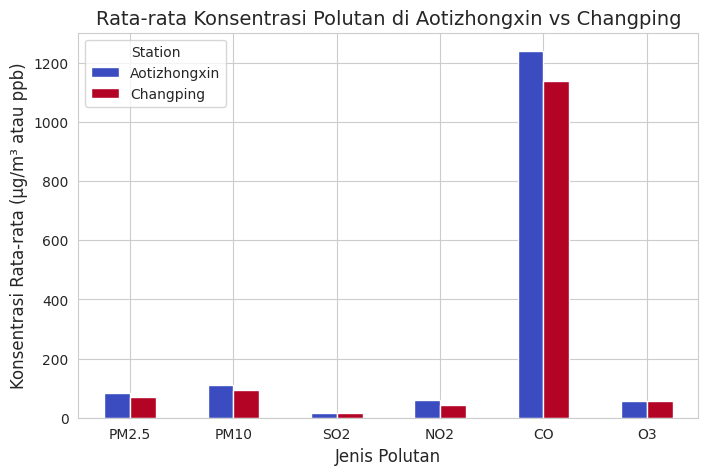

In [24]:
sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))

df_pollutan.T.plot(kind="bar", figsize=(8, 5), colormap="coolwarm")
plt.title("Rata-rata Konsentrasi Polutan di Aotizhongxin vs Changping", fontsize=14)
plt.xlabel("Jenis Polutan", fontsize=12)
plt.ylabel("Konsentrasi Rata-rata (µg/m³ atau ppb)", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Station")
plt.show()

### Pertanyaan 2: Bagaimana perubahan rata - rata PM 2.5 tiap tahun di aotizhongxin dan Changping?

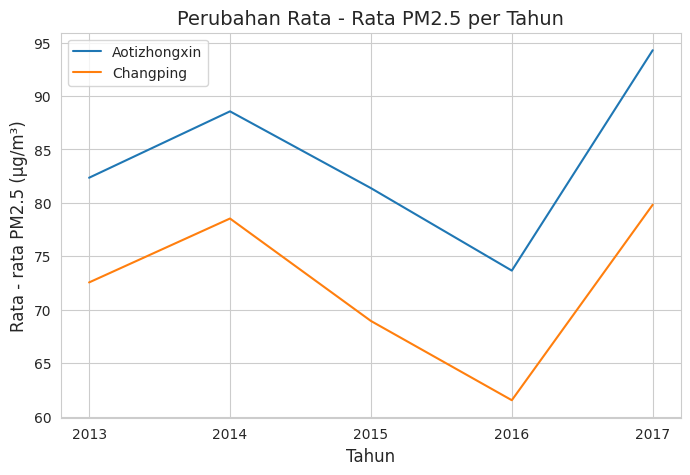

In [25]:
plt.figure(figsize=(8, 5))

sns.lineplot(x=df_pm25.index, y=df_pm25["Aotizhongxin"], label="Aotizhongxin", data=df_pm25)
sns.lineplot(x=df_pm25.index, y=df_pm25["Changping"], label="Changping", data=df_pm25)
plt.title("Perubahan Rata - Rata PM2.5 per Tahun", fontsize=14)
plt.xlabel("Tahun", fontsize=12)
plt.ylabel("Rata - rata PM2.5 (µg/m³)", fontsize=12)
plt.xticks(df_pm25.index)
plt.legend()



**Insight:**
- Polusi udara memiliki kesamaan pada naik turunnya
- Aotizhongxin selalu lebih tinggi polusinya dibanding Changping

## Conclusion

- Aotizhongxin memiliki polusi lebih tinggi dibanding Changping untuk semua jenis polutan, PM2.5 dan PM10 adalah polutan yang dominan di dua tempat tersebut.
- Polusi udara memiliki kenaikan dan penurunan yang cenderung sama, turun pada 2016 dan naik signifikan pada 2017. perbedaannya adalah Aotizhongxin selalu lebih berpolusi daripada Changping